# Unsupervised Machine Learning with Uber

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [3]:
url = 'https://github.com/fivethirtyeight/uber-tlc-foil-response/blob/master/uber-trip-data/uber-raw-data-jun14.csv?raw=true'
date_cols = ['Date/Time']

data = pd.read_csv(url, parse_dates=date_cols)

Check dataset

In [4]:
data.head(10)

,Date/Time,Lat,Lon,Base
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512
5,2014-06-01 00:08:00,40.7152,-73.9917,B02512
6,2014-06-01 00:08:00,40.7282,-73.9910,B02512
7,2014-06-01 00:08:00,40.3042,-73.9794,B02512
8,2014-06-01 00:09:00,40.7270,-73.9915,B02512
9,2014-06-01 00:10:00,40.7221,-73.9965,B02512


Sample dataset to 10% to make modeling easier

In [5]:
data = data.sample(frac=.1, axis=0, random_state=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66384 entries, 348280 to 4012
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date/Time  66384 non-null  datetime64[ns]
 1   Lat        66384 non-null  float64       
 2   Lon        66384 non-null  float64       
 3   Base       66384 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.5+ MB


## Data cleaning & EDA

In [ ]:
data.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [ ]:
num_data = data.select_dtypes(exclude=['object'])
num_data

,Date/Time,Lat,Lon
348280,2014-06-13 19:00:00,40.6936,-73.9560
156470,2014-06-15 13:56:00,40.7355,-74.0037
532688,2014-06-11 20:39:00,40.7070,-74.0137
90217,2014-06-07 21:44:00,40.7051,-74.0100
103242,2014-06-09 16:14:00,40.7601,-73.9717
...,...,...,...
258226,2014-06-28 12:57:00,40.7230,-74.0032
470420,2014-06-02 23:03:00,40.7510,-73.9869
575523,2014-06-18 10:31:00,40.7602,-73.9788
161597,2014-06-16 11:52:00,40.6984,-73.9086


Check data distribution in both columns

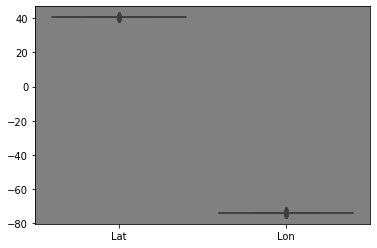

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_facecolor('grey')
sns.boxplot(data=num_data, ax=ax)
plt.show()

In [ ]:
num_data.columns

Index(['Date/Time', 'Lat', 'Lon'], dtype='object')

In [ ]:
sns.boxplot(data=data['Lat'])

In [ ]:
sns.boxplot(data=data['Lon'])

Scatter plot of clean data 

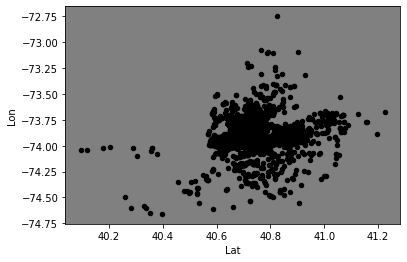

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_facecolor('grey')
data.plot.scatter(x='Lat', y='Lon', ax=ax, c='black')
plt.show()

There are clustering tendencies in the dataset, let's build clustering models to identify these clusters.

## Modeling

Assign modeling variables to X

In [6]:
X=data[['Lat','Lon']]

### Clustering with KMeans

In [ ]:
#Creation of loop to find the right cluster
from sklearn.cluster import KMeans

dict_kmeans={}
for i in range (2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    key="kmeans"+str(i)
    dict_kmeans[key] = kmeans.labels_

In [ ]:
dict_kmeans

{'kmeans10': array([5, 0, 0, ..., 4, 5, 4], dtype=int32),
 'kmeans2': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'kmeans3': array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 'kmeans4': array([0, 0, 0, ..., 1, 0, 1], dtype=int32),
 'kmeans5': array([1, 1, 1, ..., 0, 1, 0], dtype=int32),
 'kmeans6': array([5, 2, 2, ..., 0, 5, 0], dtype=int32),
 'kmeans7': array([6, 2, 2, ..., 0, 6, 0], dtype=int32),
 'kmeans8': array([2, 0, 0, ..., 4, 2, 4], dtype=int32),
 'kmeans9': array([8, 1, 1, ..., 3, 8, 3], dtype=int32)}

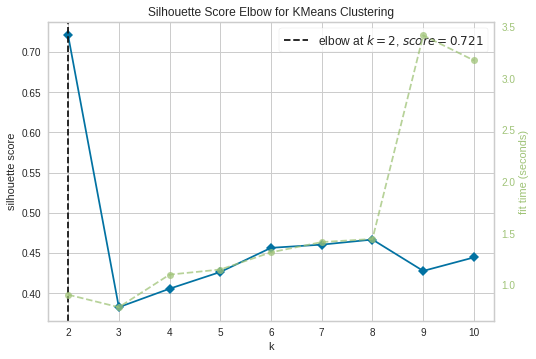

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()

visualizer = KElbowVisualizer(estimator = kmeans, k = (2,11), metric='silhouette')
visualizer.fit(X)
visualizer.poof()

Elbow indicates an optimal number of clusters of 2 with a silhouette score of 0.721.

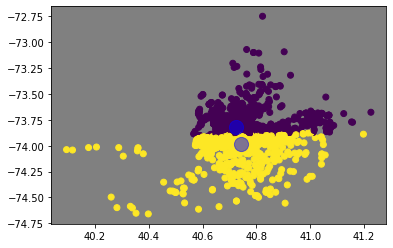

In [ ]:
# Fitting KMeans with 2 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X) #y-pred

data['kmeans_cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_

fig, ax = plt.subplots(1, 1)
ax.set_facecolor('grey')
plt.scatter(x='Lat', y='Lon', data=data, c=y_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)
plt.show()

### Clustering with DBScan

In [ ]:
# 


In [ ]:
eps=[0.02, 0.15, 0.18, 0.1]
min_samples=[2, 4, 4, 2]
k=0
for i,j in zip(eps, min_samples):
    k=k+1
    print(i)
    print(j)
    dbs = DBSCAN(eps=i, min_samples=j)
    dbs.fit(X)
    key2="db"+str(k)
    dict_kmeans[key2] = dbs.labels_

### Clustering WITH SpectralClustering

In [ ]:
# find the optimal numbers of clusters with SpectralClustering
from sklearn.cluster import SpectralClustering

dict_sc={}
for i in range (2,11):
    SC = SpectralClustering(n_clusters=2, assign_labels='discretize',random_state=0)
    SC.fit(X)
    key="SC"+str(i)
    dict_sc[key] = SC.labels_

dict_sc

###  Clustering WITH GAUSSIAN MIXTURE MODEL

In [12]:
X

,Lat,Lon
348280,40.6936,-73.9560
156470,40.7355,-74.0037
532688,40.7070,-74.0137
90217,40.7051,-74.0100
103242,40.7601,-73.9717
...,...,...
258226,40.7230,-74.0032
470420,40.7510,-73.9869
575523,40.7602,-73.9788
161597,40.6984,-73.9086


In [15]:
# find the optimal numbers of clusters with GAUSSIAN
from sklearn.mixture import GaussianMixture


dict_gmm={}
for i in range (2,11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    key="gmm"+str(i)
    dict_gmm[key] = gmm.predict(X)

dict_gmm


{'gmm10': array([8, 3, 3, ..., 0, 4, 0]),
 'gmm2': array([1, 0, 0, ..., 0, 1, 0]),
 'gmm3': array([1, 0, 0, ..., 0, 1, 0]),
 'gmm4': array([2, 0, 0, ..., 0, 3, 1]),
 'gmm5': array([4, 0, 3, ..., 0, 4, 0]),
 'gmm6': array([0, 4, 4, ..., 1, 0, 1]),
 'gmm7': array([5, 2, 2, ..., 0, 4, 0]),
 'gmm8': array([2, 3, 3, ..., 0, 2, 0]),
 'gmm9': array([8, 0, 0, ..., 2, 5, 2])}

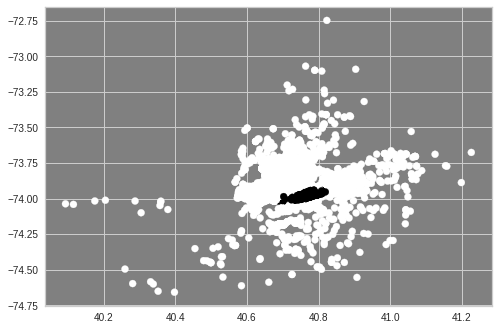

In [25]:
# Fitting Gaussian with 2 clusters
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X)
y_gmm = gmm.predict(X)

data['gmm_cluster'] = gmm.predict(X)

fig, ax = plt.subplots(1, 1)
ax.set_facecolor('grey')
plt.scatter(x='Lat', y='Lon', data=data, c=y_gmm)

## Clustering with AgglomerativeClustering

In [ ]:
# find the optimal numbers of clusters for AC
from sklearn.cluster import AgglomerativeClustering

agc_dict={}
for i in range (2,4):
    agc = AgglomerativeClustering(n_clusters=i)
    agc.fit(X)
    key1="agc"+str(i)
    agc_dict[key1] = agc.labels_

agc_dict

In [ ]:

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

In [ ]:
#AGGLOMEATIVECLUSTERING
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  #3: so only 3 label
agc.fit_predict(data_scaled)
y_agglomerative=agc.labels_


plt.figure(figsize=(10, 7))  
plt.scatter(data['X1'], data['X2'], c=y_agglomerative,  cmap='viridis') 
plt.xlabel("X1X1")
plt.ylabel("X2X2")

## Model Comparison

In [19]:
def unsupervised_metrics(X, y_pred):
    """
    Function to evaluate models based on different metrics:
    Homogeneity, Completeness, V-measure, adjusted_rand, AMI, 
    Silhouette Coefficient, Variance Ratio Criterion, Fowlkes Mallows
    
    """
    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)


In [22]:
for key in dict_gmm:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_gmm[key])


 gmm2
Silhouette Coefficient: 0.523
Variance Ratio Criterion: 11963.945

 gmm3
Silhouette Coefficient: 0.513
Variance Ratio Criterion: 13868.857

 gmm4
Silhouette Coefficient: 0.306
Variance Ratio Criterion: 8350.740

 gmm5
Silhouette Coefficient: 0.312
Variance Ratio Criterion: 9933.340

 gmm6
Silhouette Coefficient: 0.426
Variance Ratio Criterion: 11314.289

 gmm7
Silhouette Coefficient: 0.432
Variance Ratio Criterion: 9992.610

 gmm8
Silhouette Coefficient: 0.299
Variance Ratio Criterion: 11996.665

 gmm9
Silhouette Coefficient: 0.360
Variance Ratio Criterion: 7575.404

 gmm10
Silhouette Coefficient: 0.443
Variance Ratio Criterion: 22682.709


## Vizualise data on a map

In [ ]:
import folium

uber_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to uber_map'''
    folium.CircleMarker(location=[point.Lat, point.Lon],
                        radius=2,
                        weight=5).add_to(uber_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
X.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
uber_map.fit_bounds(uber_map.get_bounds())

#Save the map to an HTML file
uber_map.save('uber_map.html')

uber_map



In [ ]:
uber_map

In [ ]:
folium.Map(tiles='Stamen Toner', zoom_start=13)